In [1]:
#install kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#upload file json

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gumballsadas","key":"5f179dfc205fe78873257f8087d6f2f0"}'}

In [3]:
#membuat directory kaggle dan dataset
!mkdir ~/.kaggle
!mkdir datasets

In [4]:
#Buat direktori bernama kaggle dan salin file kaggle.json di sana.
!cp kaggle.json ~/.kaggle/

In [5]:
#Ubah hak akses file
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
#list kaggle dataset
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                       Diabetes Dataset                                      9KB  2022-10-06 08:55:25          18493        523  1.0              
akshaydattatraykhare/data-for-admission-in-the-university   Data for Admission in the University                  4KB  2022-10-27 11:05:45           5381        125  1.0              
thedevastator/jobs-dataset-from-glassdoor                   Salary Prediction                                     3MB  2022-11-16 13:52:31           1648         47  1.0              
meirnizri/covid19-dataset                                   COVID-19 Dataset    

In [7]:
#download dataset dari kaggle
!kaggle datasets download -d neuromusic/avocado-prices

  0% 0.00/629k [00:00<?, ?B/s]
100% 629k/629k [00:00<00:00, 97.5MB/s]


In [8]:
#unzip dataset yang telah didownload
!unzip /content/avocado-prices -d datasets/

Archive:  /content/avocado-prices.zip
  inflating: datasets/avocado.csv    


In [9]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [10]:
# load the dataset
op = pd.read_csv('/content/datasets/avocado.csv')
op

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#Data Understanding



*   Memberikan informasi seperti jumlah data, kondisi data, dan informasi mengenai data yang digunakan 
*   Menuliskan tautan sumber data (https://www.kaggle.com/datasets/neuromusic/avocado-prices/code)
*   Menguraikan seluruh variabel atau fitur pada data.

##keterangan columns pada the dataset:

Date - Tanggal Observasi data

AveragePrice - Harga rata-rata pada satu buah alpukat

type - Konvensional atau organik

year - Tahun

Region - Daerah observasi

Total Volume - Jumlah alpukat yang terjual

4046 - Total jumlah alpukat dengan PLU 4046 terjual

4225 - Total jumlah alpukat dengan PLU 4225 terjual

4770 - Total jumlah alpukat dengan PLU 4770 terjual

##Note
PLU merupakan *Price look-up* nomor berisi 4-5 digit untuk mengidentifikasian suatu produk, berguna untuk memudahkan proses check-out dan juga memudahkan *inventory control*.



In [11]:
#melihat ukuran data pada dataset
op.shape

(18249, 14)

In [12]:
#melihat informasi dataset
op.info

<bound method DataFrame.info of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13

In [13]:
#melihat nilai numeric dataset
op.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [14]:
# Datanya belum bertype Date yang kolom Date jadi convert / ubah dulu
op['Date'] = pd.to_datetime(op['Date'])


In [15]:
#melihat informasi dataset
op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


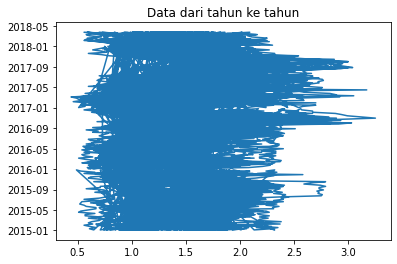

In [16]:
# Cek perubahan harga data dari tahun ke tahun
plt.title(f'Data dari tahun ke tahun')
plt.plot(op['AveragePrice'], op['Date'])
plt.show()

In [17]:
# Kita coba cek sebaran dengan cycle per tahun
year = op['Date'].dt.year
year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
18244    2018
18245    2018
18246    2018
18247    2018
18248    2018
Name: Date, Length: 18249, dtype: int64

In [18]:
# melihat nilai unik pada tahun 
year.unique()

array([2015, 2016, 2017, 2018])

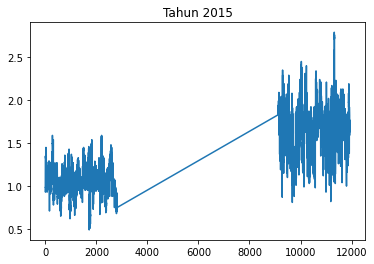

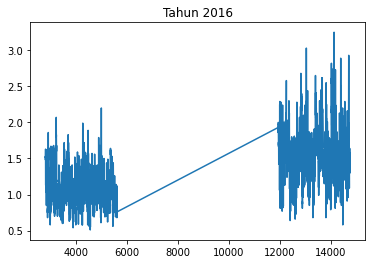

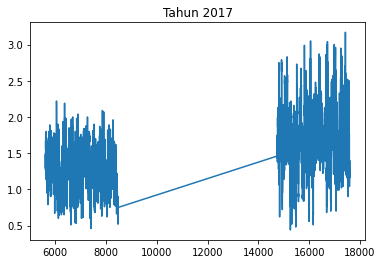

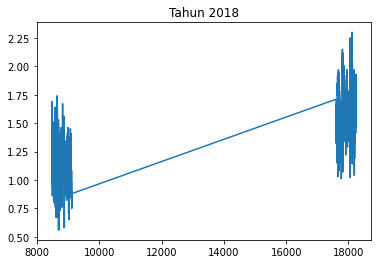

In [19]:
#visualisasi data tiap tahun
for y in year.unique():
  plt.title(f'Tahun {y}')
  plt.plot(op[op['Date'].dt.year == y].AveragePrice)
  plt.show()

Setelah dilakukan visualisasi 

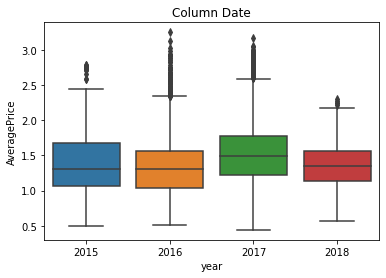

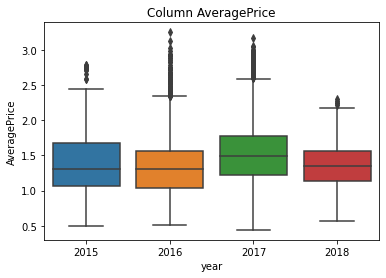

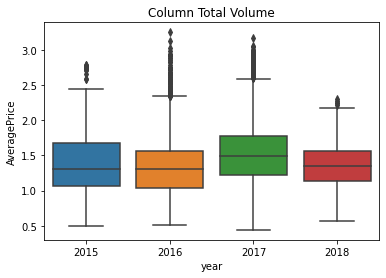

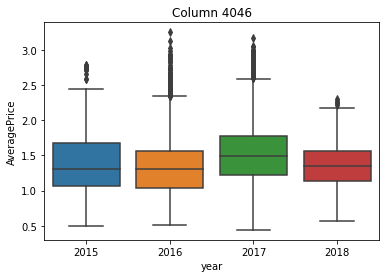

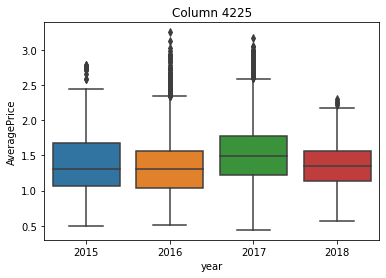

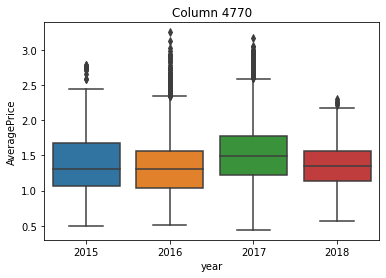

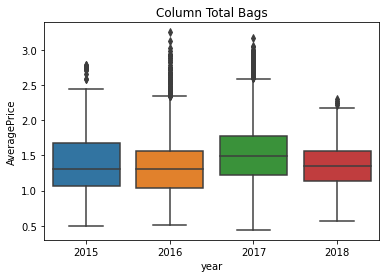

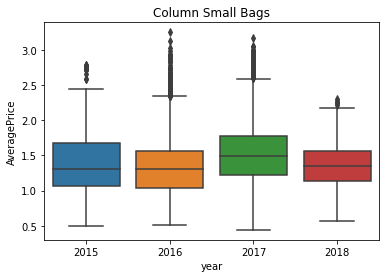

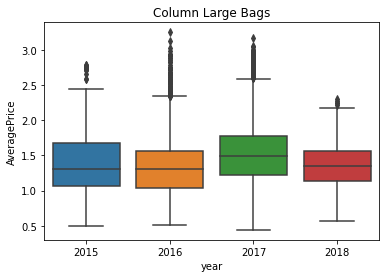

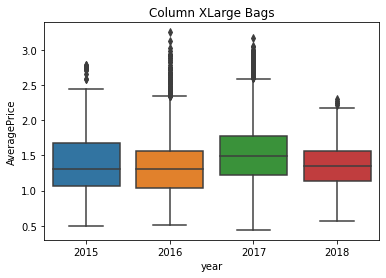

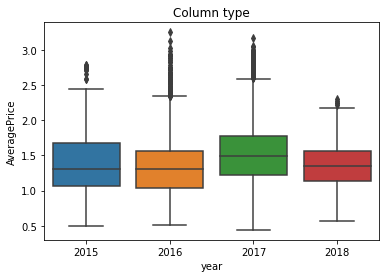

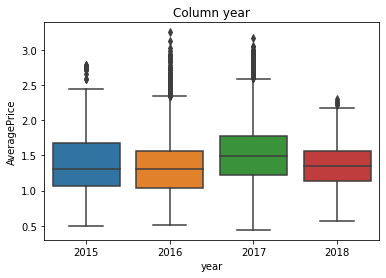

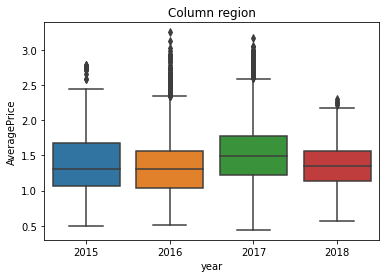

In [20]:
#visualisasi boxplot 
columns = np.delete(op.columns, 0)
for col in columns:
  plt.title(f'Column {col}')
  sns.boxplot(x="year", y="AveragePrice", data=op)
  plt.show()

In [21]:
# kita drop kolom yang tidak terpakai seperti date dan unnamed
new_op = op.drop('Date', axis=1)
new_op1 = new_op.drop('Unnamed: 0', axis=1)
new_op1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


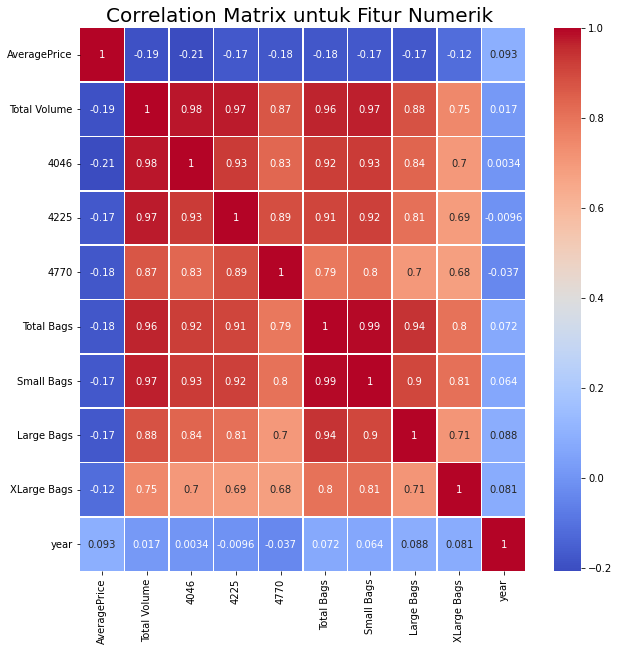

In [22]:
#melihat korelasi matrix
plt.figure(figsize=(10,10))
sns.heatmap(new_op1.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.show()

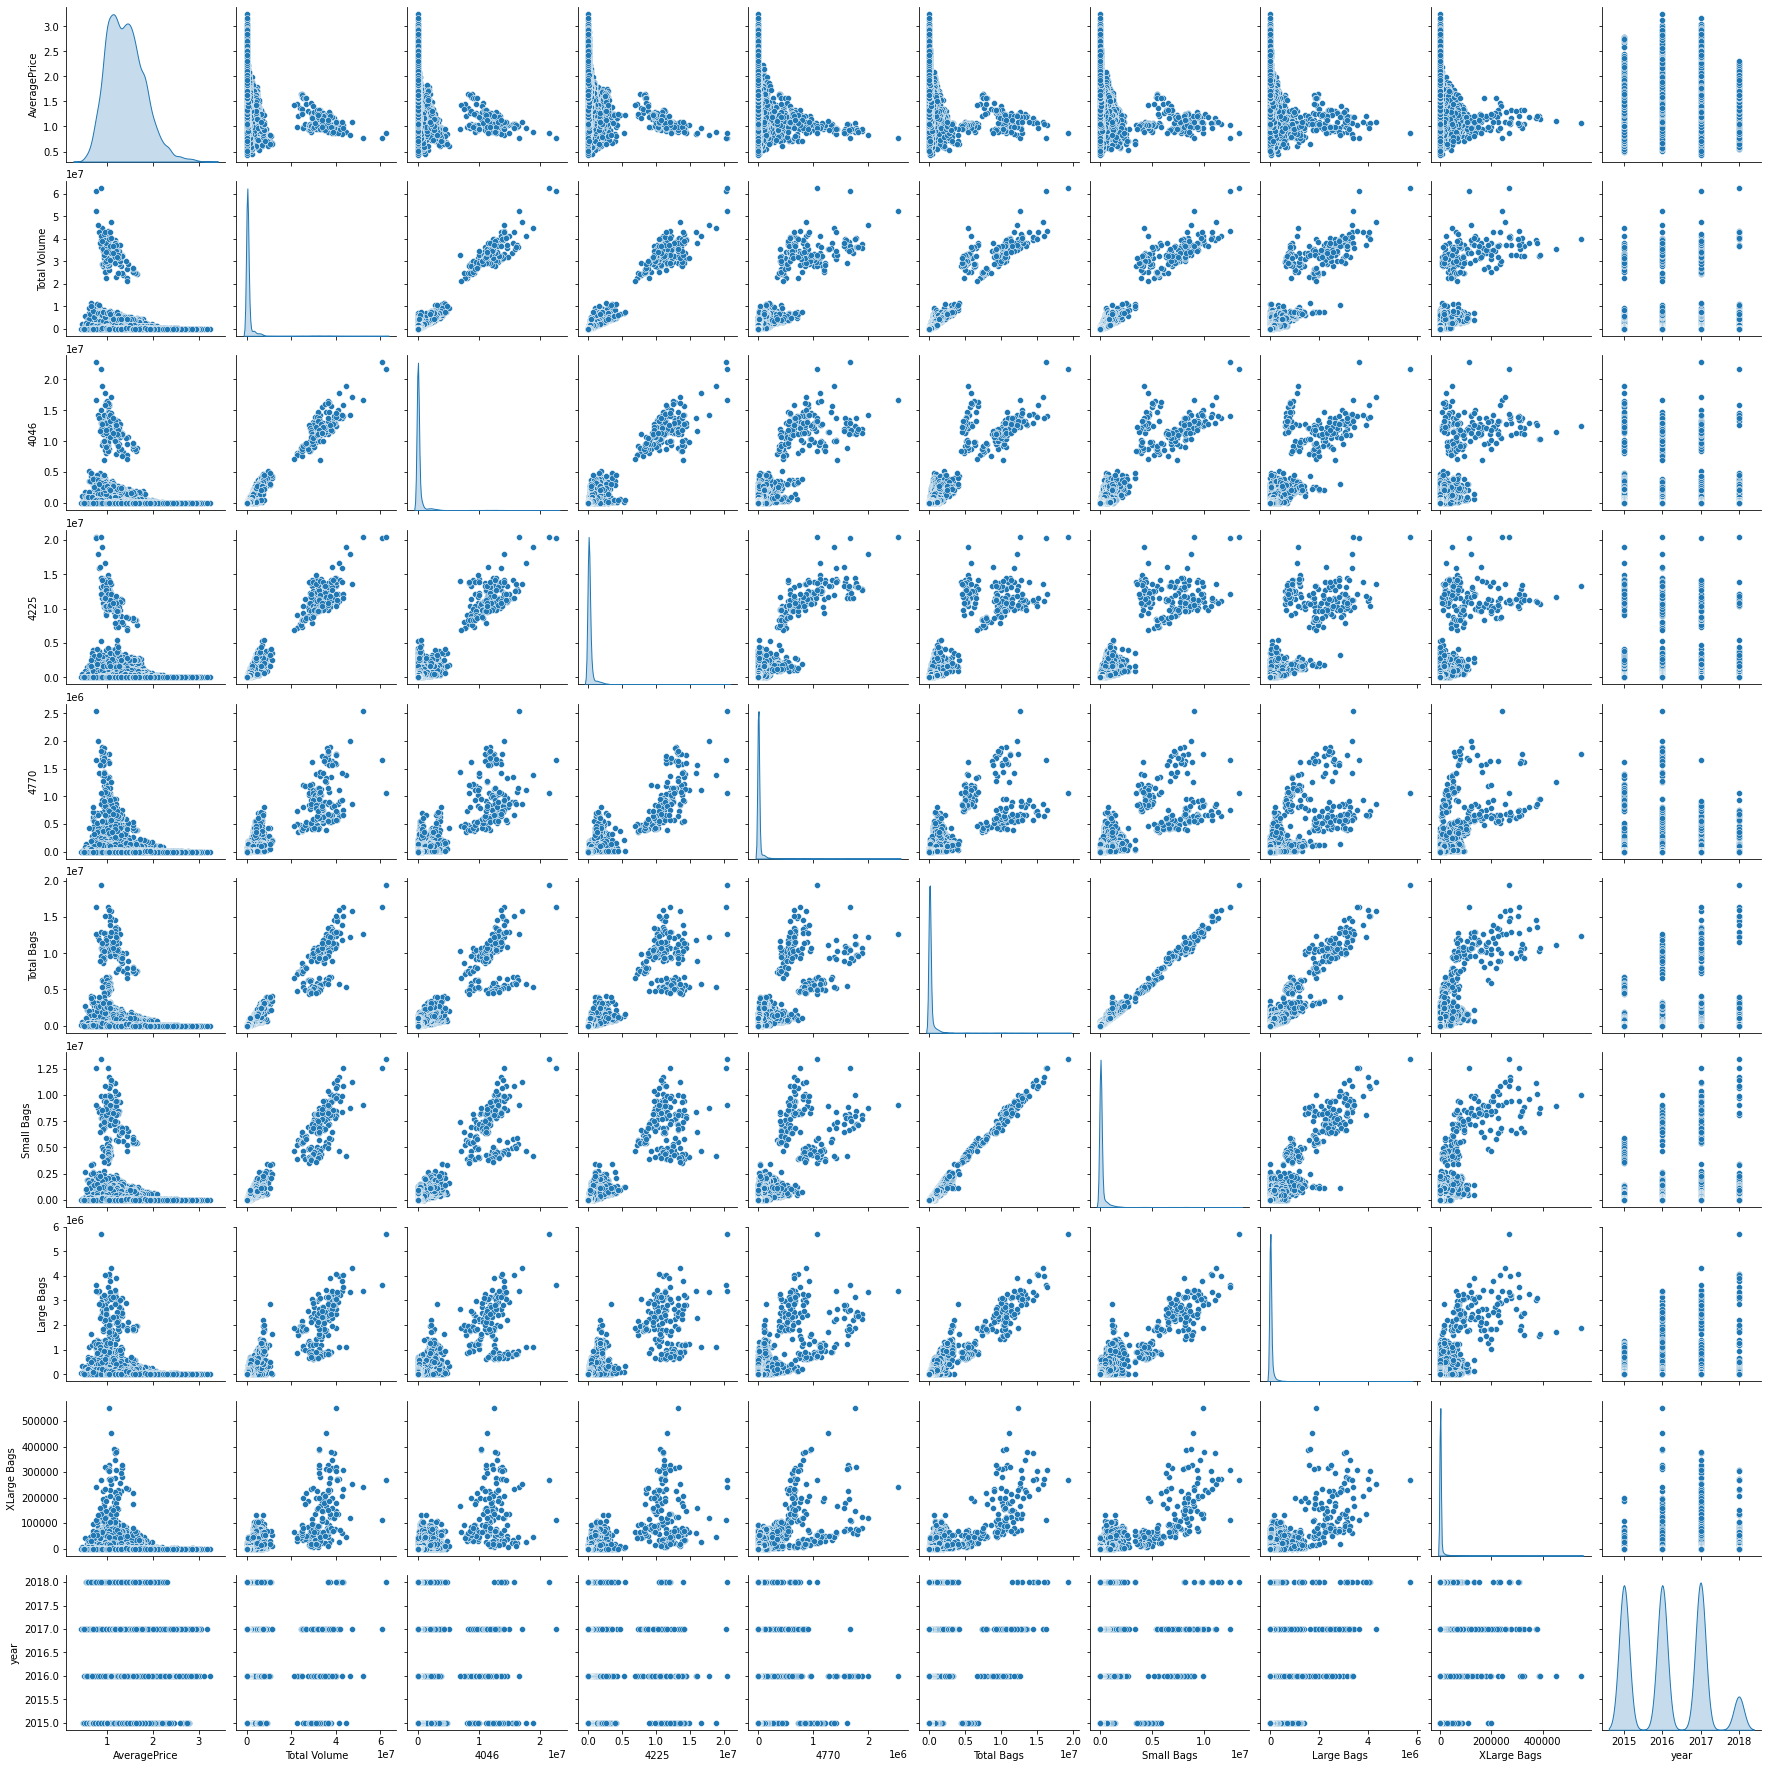

In [23]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(new_op1, diag_kind = 'kde')

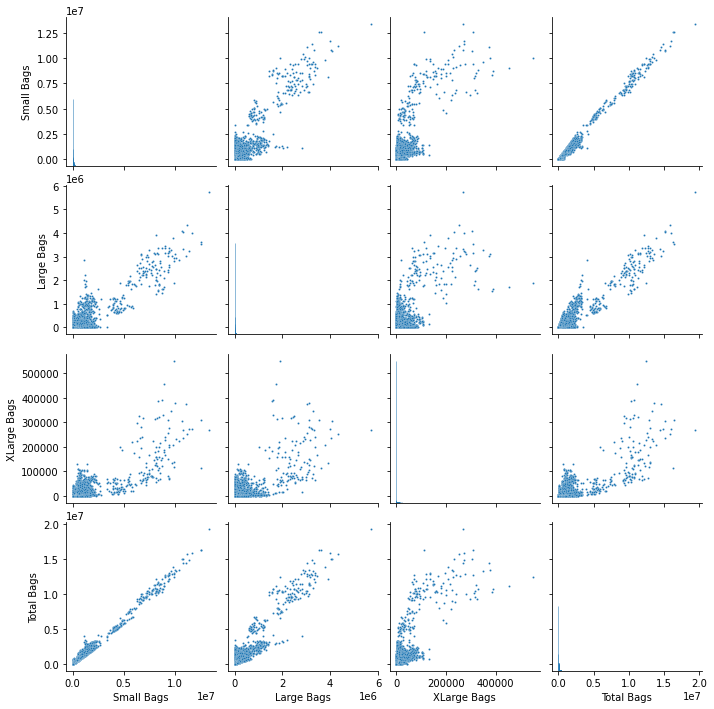

In [24]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot berdasarkan ukuran kantong
sns.pairplot(new_op1[['Small Bags','Large Bags','XLarge Bags','Total Bags']], plot_kws={"s": 4}, diag_kws=dict(fill=False));

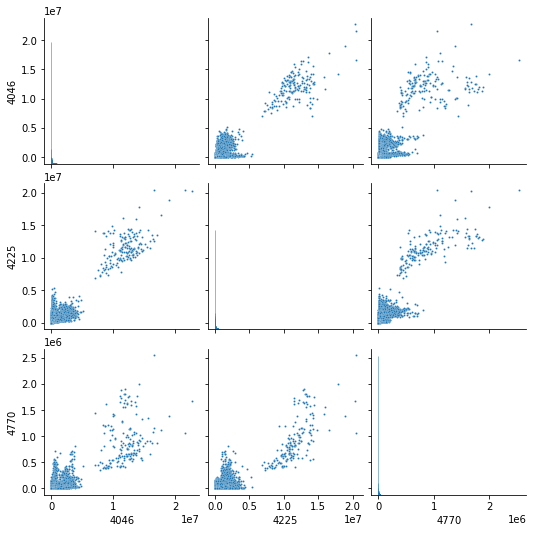

In [25]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot berdasarkan jenis PLU
sns.pairplot(new_op1[['4046','4225','4770',]], plot_kws={"s": 4}, diag_kws=dict(fill=False));

#Data Preparation

*   Menerapkan dan menyebutkan teknik data preparation yang dilakukan.
*   Teknik yang digunakan pada notebook dan laporan harus berurutan.


*   Menjelaskan proses data preparation yang dilakukan
*   Menjelaskan alasan mengapa diperlukan tahapan data preparation tersebut.




In [26]:
#menunjukan isi dari dataset
new_op1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [27]:
#untuk melakukan MinMaxScaller kita drop region dan type pada tabel
from sklearn.preprocessing import MinMaxScaler
new_op2 = new_op1.drop('type', axis=1)
new_op3 = new_op2.drop('region', axis=1)

scaler = MinMaxScaler()

final_op = new_op3
scaler.fit(final_op[final_op.columns])
final_op[final_op.columns] = scaler.transform(final_op.loc[:, final_op.columns])

final_op

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0.0
1,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0.0
2,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0.0
3,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0.0
4,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
18244,0.423488,0.000272,0.000090,0.000075,0.000000,0.000697,0.000976,0.000076,0.0,1.0
18245,0.451957,0.000221,0.000052,0.000168,0.000000,0.000478,0.000668,0.000057,0.0,1.0
18246,0.508897,0.000219,0.000052,0.000120,0.000286,0.000485,0.000699,0.000007,0.0,1.0
18247,0.530249,0.000258,0.000067,0.000146,0.000286,0.000566,0.000816,0.000009,0.0,1.0


In [28]:
#melihat deskripsi data
final_op.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,0.343765,0.013608,0.012883,0.014418,0.008969,0.012370,0.013612,0.009501,0.005631,0.382633
std,0.143301,0.055252,0.055620,0.058822,0.042202,0.050908,0.055749,0.042658,0.032070,0.313313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234875,0.000172,0.000038,0.000147,0.000000,0.000263,0.000213,0.000022,0.000000,0.000000
50%,0.330961,0.001717,0.000380,0.001420,0.000073,0.002051,0.001970,0.000463,0.000000,0.333333
75%,0.434164,0.006925,0.004881,0.007338,0.002452,0.005718,0.006226,0.003852,0.000240,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Abis di Standar tinggal di split, jadi data test tinggal tembak aja pake pred
from sklearn.model_selection import train_test_split

X, y = final_op.drop('AveragePrice', axis=1), final_op['AveragePrice']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=767)

#Modeling


*   Membuat model machine learning untuk menyelesaikan permasalahan.

*   Menjelaskan tahapan dan parameter yang digunakan pada proses pemodelan.
*   Menjelaskan kelebihan dan kekurangan dari setiap algoritma yang digunakan.

*   Jika menggunakan satu algoritma pada solution statement, lakukan proses improvement terhadap model dengan hyperparameter tuning. Jelaskan proses improvement yang dilakukan.


*  Jika menggunakan dua atau lebih algoritma pada solution statement, maka pilih model terbaik sebagai solusi. Jelaskan mengapa memilih model tersebut sebagai model terbaik.




In [30]:
#import library
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Siapkan dataframe untuk analisis model
report = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['GradientBoosting', 'RandomForest', 'XGB', 'LGBM'])

In [32]:
# buat model prediksi
# model Random Forest
# n_estimator = number of tree in the forest
# max_depth = max kedalaman tree
# n_jobs = -1 using all processor
RF = RandomForestRegressor(n_estimators=100, random_state=55, n_jobs=-1)
RF.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=55)

In [33]:
#Model XGradient boosting
XGB = GradientBoostingRegressor()
XGB.fit(x_train, y_train)

GradientBoostingRegressor()

In [34]:
#Model Light GBM
LGBM = LGBMRegressor()
LGBM.fit(x_train, y_train)

LGBMRegressor()

In [35]:
#Model GB
GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)

GradientBoostingRegressor()

In [36]:
#MOdel KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

#Evaluation



*   Menyebutkan metrik evaluasi yang digunakan.
*   Menjelaskan hasil proyek berdasarkan metrik evaluasi.

*   Menjelaskan metrik evaluasi yang digunakan untuk mengukur kinerja model. Misalnya, menjelaskan formula metrik dan bagaimana metrik tersebut bekerja.





In [37]:
#menentukan nilai MSE dan R2 pada setiap model
hasil_akhir = {'Model_Name': [], 'mse': [], 'r2': []}
pred = GB.predict(x_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
hasil_akhir['Model_Name'].append('GB')
hasil_akhir['mse'].append(mse)
hasil_akhir['r2'].append(r2)
pred = LGBM.predict(x_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
hasil_akhir['Model_Name'].append('LGBM')
hasil_akhir['mse'].append(mse)
hasil_akhir['r2'].append(r2)
pred = RF.predict(x_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
hasil_akhir['Model_Name'].append('RF')
hasil_akhir['mse'].append(mse)
hasil_akhir['r2'].append(r2)
pred = XGB.predict(x_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
hasil_akhir['Model_Name'].append('XGB')
hasil_akhir['mse'].append(mse)
hasil_akhir['r2'].append(r2)
pred = knn.predict(x_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
r2 = r2_score(y_test, pred)
hasil_akhir['Model_Name'].append('knn')
hasil_akhir['mse'].append(mse)
hasil_akhir['r2'].append(r2)

In [38]:
#melihat hasil dari nilai MSE,R2 pada setiap model
hasil_akhir

{'Model_Name': ['GB', 'LGBM', 'RF', 'XGB', 'knn'],
 'mse': [0.007697680972458627,
  0.00510913750762989,
  0.0038971288104254005,
  0.007697680972458626,
  0.0056274108615784494],
 'r2': [0.637759570515825,
  0.7595722436823156,
  0.8166074147402922,
  0.6377595705158251,
  0.7351831370154844]}

In [39]:
#karena angkanya terlalu banyak jadi kita ambil 5 angka dibelakang koma
pd.options.display.float_format = '{:.5f}'.format

In [40]:
#menunjukan hasil akhir dengan tampilan dataframe
hasil_akhir = pd.DataFrame.from_dict(hasil_akhir)
hasil_akhir

,Model_Name,mse,r2
0,GB,0.00770,0.63776
1,LGBM,0.00511,0.75957
2,RF,0.00390,0.81661
3,XGB,0.00770,0.63776
4,knn,0.00563,0.73518


In [41]:
#menentukan nilai RMSE
hasil_akhir['rmse'] = np.sqrt(hasil_akhir['mse'])

In [42]:
#menampilkan hasil akhir setelah ditambahkan RMSE
hasil_akhir

,Model_Name,mse,r2,rmse
0,GB,0.00770,0.63776,0.08774
1,LGBM,0.00511,0.75957,0.07148
2,RF,0.00390,0.81661,0.06243
3,XGB,0.00770,0.63776,0.08774
4,knn,0.00563,0.73518,0.07502


In [43]:
#nilai XGB,LGBM GB sama RF sama mse, rmse, r2 nya
model_dict = {'RF': RF, 'XGB': XGB, 'GB': GB, 'LGBM': LGBM, 'knn': knn}
prediksi = x_test.iloc[:180].copy()
pred_dict = {'y_true':y_test[:180]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_RF,prediksi_XGB,prediksi_GB,prediksi_LGBM,prediksi_knn
15017,0.31673,0.40000,0.40000,0.40000,0.40000,0.50000
6821,0.19217,0.20000,0.30000,0.30000,0.20000,0.20000
9412,0.49466,0.50000,0.40000,0.40000,0.40000,0.50000
10258,0.36299,0.40000,0.40000,0.40000,0.40000,0.40000
14158,0.65125,0.70000,0.50000,0.50000,0.60000,0.70000
...,...,...,...,...,...,...
7090,0.24555,0.30000,0.30000,0.30000,0.30000,0.30000
8725,0.18505,0.30000,0.30000,0.30000,0.30000,0.30000
8657,0.32384,0.30000,0.30000,0.30000,0.30000,0.30000
8377,0.26335,0.40000,0.30000,0.30000,0.30000,0.30000


In [44]:
#menampilkan score dari setiap model
print("Accuracy score dari model LGBM              = ", LGBM.score(x_test, y_test))
print("Accuracy score dari model GB                = ", GB.score(x_test, y_test))
print("Accuracy score dari model XGB               = ", XGB.score(x_test, y_test))
print("Accuracy score dari model Random Forest     = ", RF.score(x_test, y_test))
print("Accuracy score dari KNN                     = ", knn.score(x_test, y_test))

Accuracy score dari model LGBM              =  0.7595722436823156
Accuracy score dari model GB                =  0.637759570515825
Accuracy score dari model XGB               =  0.6377595705158251
Accuracy score dari model Random Forest     =  0.8166074147402922
Accuracy score dari KNN                     =  0.7351831370154844
